*Le template est ici utilisé sur Iris. Le contexte d'utilisation a été inventé pour les besoins de l'exercice. Nous nous mettons dans la peau d'une ESN contactée par l'entreprise Flower Power.*

*Le code correspondant à chaque phase a été mis dans le même fichier. Dans un vrai projet, la documentation serait séparée du code. De plus chaque phase pourrait faire l'objet d'un documentation à part.*

In [1]:
!pip install -U pip
!pip install -U numpy
!pip install -U seaborn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils 

# Business Understanding

Cette phase a été menée via 2 ateliers avec le client.

## Objectifs métiers

### Contexte projet

L'entreprise d'horticulture "Flower Power" vend de nombreuses fleurs. Ses clients lui demandent souvent des conseils pour savoir quelles plantes poussent dans leurs jardins.

Flower Power souhaite donc proposer une application mobile où les clients pourraient déterminer automatiquement la variété. 

Pour cela, il faudra :
* une application mobile, type Android ou IoS
* un premier modèle pour détecter les fleurs
* une application de mesure des fleurs détectées
* un deuxième modèle permettant de classer la fleur d'après ses mensurations.

### Objectifs métiers

Un PoC est lancé sur le deuxième modèle. En effet, les autres points nécessaires de l'application complète ont été estimés moins risqués. L'entreprise ne connaissant pas réellement le domaine du Machine Learning, ils souhaitent donc valider les possibilités de reconnaissance des variétés d'Iris (leur plus grosse vente).

Les espèces choisies sont les iris Versicolor, Virginica et Setosa.

### Critères de succès métiers

Dans le cadre de ce PoC et pour valider l'approche, seul le dernier modèle sera développé. Sur une plante possédant plusieurs fleurs, l'entreprise souhaite que le résultat soit juste dans au moins 90% des cas (on part sur au moins 3 fleurs par plant).

## Évaluation de la situation

### Ressources, Spécifications, Hypothèses et Contraintes

**Ressources** : 

L'entreprise Flower Power ne possède pas de ressources pour ce PoC. Nous utiliserons donc nos ressources propres pour ce PoC, dont nos équipes Data Science.

**Spécifications** : 

Le modèle est développé ici en PoC, et ne sera donc pas intégré dans une application plus globale. A terme cependant, il sera nécessaire de créer une API qui recevra les informations de taille sous la forme d'un json et répondra avec la variété reconnue. Cette API sera hébergée dans le cloud.

**Hypothèses** : 

L'hypothèse principale du PoC est que la reconnaissance des Iris est représentative de la difficulté qui sera rencontrée pour les autres fleurs.

**Contraintes** : 

Le PoC doit être fini avant la présentation au CoDir pour valider l'ensemble du projet, soit un délai total de 5j ouvrés.

### Risques

| Risque | Probabilité | Impact | Mitigation |
|---|---|---|---|
|Manque de données|Elevée|Elevé|Une phase de mesure a été demandée en amont, avant le lancement effectif du projet, pour obtenir suffisamment de données|
|Données non représentatives|Moyenne|Elevé|Flower Power a confirmé qu'ils pensaient que l'exemple était vraiment représentatif. Un deuxième PoC sur une autre variété de fleurs sera peut être nécessaire.|
|Manque de temps|Moyenne|Fort|L'approche CRISP est idéale, car elle permet de mieux prévoir et gérer l'avancement du projet|

### Terminologie

*La terminologie du Machine Learning est ici supprimée pour un gain de place, mais il faudrait expliquer tous les termes principaux, voire faire un atelier dédié avec le client sous la forme d'une mini formation.*

Les Iris sont des fleurs généralement violettes, faisant partie des plantes vivaces (qui survivent donc plusieurs années). Il en existe plus de 200 espèces.

Les fleurs contiennent au centre le pistil (organe reproducteur), puis la corolle, composée des pétales, et enfin le calice, composé des sépales.

Voici un schéma d'explication issu de Wikipedia :

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Mature_flower_diagram-fr.svg/2560px-Mature_flower_diagram-fr.svg.png)

### Coûts et bénéfices

Ce projet va service à lancer ou non le projet global. Les gains sont donc surtout d'économiser en ne faisant pas le projet si les risques de réussite sont trop faibles.

## Objectifs ML

Une classification sera effectuée. Au moins 90% des plants d'au moins 3 fleurs doivent être reconnus, et donc il faut au moins une majorité de fleurs dans la bonne catégorie pour que l'ensemble du plant soit bien classé.

Les erreurs ayant toutes le même poids, c'est donc l'accuracy qui sera utilisée comme métrique, avec au moins 70% de réussite pour valider le modèle.

## Planification projet

A la vue des contraintes temporelles, une seule itération complète de 5j sera effectuée. 

# Data Understanding

Un fichier de données a été fourni pour ce PoC.

## Données source

Le fichier source s'appelle "iris.csv". Il s'agit d'un fichier contenant les mesures de 150 iris, soit 50 par espèce, avec à chaque fois les tailles des sépales et des pétales.

L'ensemble des mesures ont été prises le même jour, par la même personne, avec les mêmes instruments, pour éviter tout biais potentiel.

*En réalité le dataset a été constitué par R.A. Fisher en 1936.*

## Description des données

### Description des datasets

Un seul dataset a été fourni : iris.csv

Il est possible d'utiliser un tableau pour la mise en forme :

| Dataset | Source | Année | Nb lignes | Nb features | Données manquantes ? |
|---|---|---|---|---|---|
|iris.csv|Flower Power|2021|150|5|Pas de données manquantes|

In [2]:
import pandas as pd

# Loading the dataset
iris_df = pd.read_csv("data/iris.csv")

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.shape

(150, 5)

### Feature Description

Voici l'explication des différents champs :

| Feature | Unité | Format | Nb manquant | Description |
|---|---|---|---|---|
|sepal_length|cm|réel, une seule décimale|0|Longueur des sépales en cm|
|sepal_width|cm|réel, une seule décimale|0|Largeur des sépales en cm|
|petal_length|cm|réel, une seule décimale|0|Longueur des pétales en cm|
|petal_width|cm|réel, une seule décimale|0|Largeur des pétales en cm|
|class|X|Catégorie|0|Espèce parmi "Iris-setosa", "Iris-virginica" et "Iris-versicolor"|

In [4]:
iris_df['class'] = iris_df['class'].astype('category')
iris_df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
class           category
dtype: object

In [5]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

## Exploration des données

### Data Formating

Il n'y a pas de modification des formats nécessaires

### Statistiques univariées

Voici les statistiques sur les 4 variables explicatives :

In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Le comportement des variables ne correspond cependant pas à des distributions gaussiennes, surtout en ce qui concerne les tailles des pétales :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49c2410a50>,
      dtype=object)

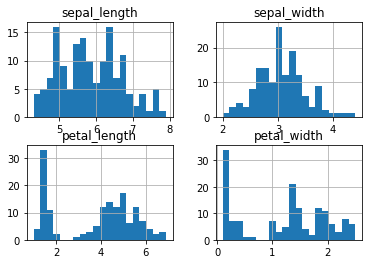

In [7]:
iris_df.hist(bins=20)

Les catégories sont également distribuées :

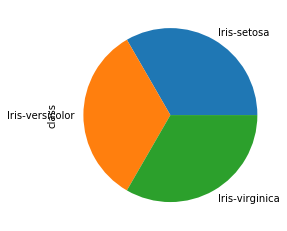

In [8]:
iris_df['class'].value_counts().plot(kind='pie')

### Statistiques bivariées

Une analyse bivariée montre que les tailles des pétales correspondent à la somme de 3 gaussiennes différentes, une part type d'Iris.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49bf761a10>,
      dtype=object)

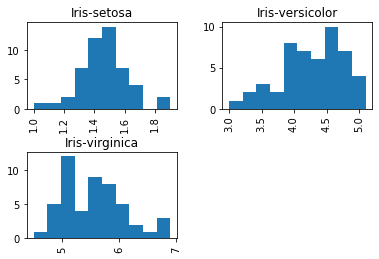

In [9]:
iris_df['petal_length'].hist(by=iris_df['class'])

De même, les pétales montrent de fortes disparités en fonction des espèces : 
* les Setosa ont de petites pétales en largeur et longueur
* les Versicolor sont de taille moyenne
* les Virginica ont de grandes pétales.

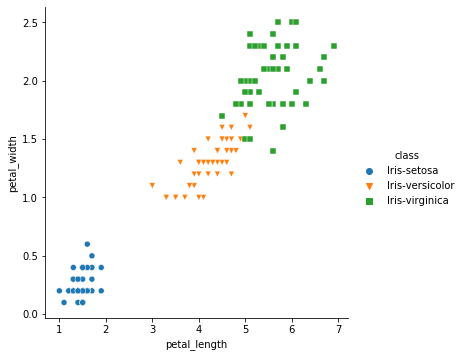

In [10]:
import seaborn as sns

sns.pairplot(iris_df, x_vars=['petal_length'], y_vars=['petal_width'], height=5, hue='class', markers=['o', 'v', 's'])

Les différences sont moins notables au niveau des sépales :

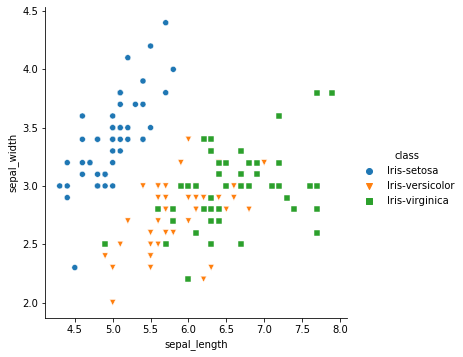

In [11]:
import seaborn as sns

sns.pairplot(iris_df, x_vars=['sepal_length'], y_vars=['sepal_width'], height=5, hue='class', markers=['o', 'v', 's'])

## Qualité des données

### Métriques

Les métriques sont les valeurs manquantes et les valeurs aberrantes.

### Data Quality Evaluation

Aucun souci de qualité n'a été relevé.

## Conclusion sur l'analyse des données

Les tailles des pétales semblent être l'indicateur le plus parlant. De plus les Iris Setosa semblent plus facile à discriminer que les deux autres.

# Data Preparation

*Les données sont ici directement prêtes à être utilisées, mais cette phase peut être très longue.*

## Sélection des données

Toutes les données du dataset original seront conservées. Un ensemble de test est créé contenant 20% du dataset.

In [12]:
from sklearn.model_selection import train_test_split

y = iris_df['class']
X = iris_df.drop(labels='class', axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## Nettoyage des données

Il n'y a pas non plus de nettoyage à faire.

## Construction des données

Seuls les champs d'origine seront conservés.

## Intégration de données

Aucune donnée extérieure ne sera utilisée.

## Formatage

Les données n'ont pas besoin de formatage particulier. Par contre les différentes tailles sont normalisées selon une normalisation robuste.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

pipeline = Pipeline([('robustscaler', RobustScaler())])
train_X = pipeline.fit_transform(train_X)

# Modeling

## Généralités

### Design des tests

Le modèle choisi sera testé sur l'ensemble de test. Pour l'entrainer, une cross-validation à 3 folds sera réalisée sur l'ensemble d'entrainement.

La métrique utilisée est l'accuracy.

### Techniques de modélisation

*Des détails sont disponibles dans le livre. Les algorithmes ne seront pas détaillés ici.*

Différents modèles seront testés :
* un arbre de décision
* random forest
* KNN.

Une optimisation des hyperparamètres pourra être faite via une grille.

## Présentation des différents modèles réalisés

### Modèle 1 : arbre de décision

Un arbre de décision (DecisionTreeClassifier) donne une accuracy de presque 95% avec comme hyperparamètres :
* max_depth : 3
* min_samples_split : 2 (valeur par défaut)
* splitter : best (valeur par défaut).

Ce résultat semble suffisant pour le PoC, avec une faible complexité. Il est à noter que plus de 93% de la décision vient de la longueur de la pétale, le reste de sa largeur. Les tailles des sépales ne sont pas prises en compte. Cela est cohérent avec l'analyse statistique.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params_grid = {'max_depth':[3, 4, 5],
         'splitter':['best', 'random'],
         'min_samples_split':[2, 3, 4]}
tree_classifier = DecisionTreeClassifier(random_state=42)
grid_classifier = GridSearchCV(tree_classifier, param_grid=params_grid, scoring='accuracy', cv=3)

grid_classifier.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [15]:
grid_classifier.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=42)

In [16]:
grid_classifier.best_score_

0.9499999999999998

In [17]:
grid_classifier.best_estimator_.feature_importances_

array([0.        , 0.        , 0.93462632, 0.06537368])

### Modèle 2 : Random Forest

Une random forest (RandomForestClassifier) donne une accuracy de presque 96% avec comme hyperparamètres :
* n_estimators : 10
* max_depth : 3
* min_samples_split : 2 (valeur par défaut).

Ce modèle apporte un gain d'1% par rappport à un arbre de décision mais en ayant alors 10 arbres. La complexité ajoutée ne semble pas justifiée.

La décision est alors bien plus complexe, avec environ 14% sur la longueur des sépales, 45% sur la longueur des pétales et 41% sur la largeur des pétales.

In [18]:
from sklearn.ensemble import RandomForestClassifier

params_grid = {'n_estimators':[5, 10, 15],
         'max_depth':[2, 3, 4],
         'min_samples_split':[2, 3, 4]}
forest_classifier = RandomForestClassifier(random_state=42)
gridf_classifier = GridSearchCV(forest_classifier, param_grid=params_grid, scoring='accuracy', cv=3)

gridf_classifier.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

In [19]:
gridf_classifier.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [20]:
gridf_classifier.best_score_

0.9583333333333334

In [21]:
gridf_classifier.best_estimator_.feature_importances_

array([0.13515808, 0.01144637, 0.44830232, 0.40509323])

### Modèle 3 : K Plus Proches Voisins (KNN)

Un algorithme KNN (KNeighborsClassifier) donne une accuracy de presque 93% avec comme hyperparamètres :
* n_neighbors : 3
* algorithm : 'ball_tree'
* weights : 'distance'.

Cet algorithme ne nécessite pas, en tant que tel, de créer un modèle. Cependant ses résultats sont moins bons qu'un arbre de décision, et il ne permet pas de connaitre le rôle de chaque variable.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

params_grid = {'n_neighbors':[3, 5, 7],
         'weights':['distance', 'uniform'],
         'algorithm':['ball_tree', 'kd_tree', 'brute']}
knn_classifier = KNeighborsClassifier()
gridk_classifier = GridSearchCV(knn_classifier, param_grid=params_grid, scoring='accuracy', cv=3)

gridk_classifier.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['distance', 'uniform']},
             scoring='accuracy')

In [23]:
gridk_classifier.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

In [24]:
gridk_classifier.best_score_

0.9250000000000002

## Conclusion

Le modèle conseillé est donc le premier, obtenu via un simple arbre de décision et fournissant plus de 95% d'accuracy. 

Celui-ci peut donc être testé sur l'ensemble de test, qui est normalisé comme l'ensemble d'apprentissage. Il donne alors un résultat parfait (100% d'accuracy). Ses capacités de généralisation semblent donc très bonnes.

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

test_X = pipeline.transform(test_X)
pred_y = grid_classifier.predict(test_X)
accuracy_score(test_y, pred_y)

1.0

# Evaluation

Une évaluation est proposée à Flower Power.

## Résultats de l'évaluation

Il a été proposé de tester le modèle sur de nouvelles mesures. Cependant Flower Power n'a pas encore pu produire celles-ci.

## Revue du processus

Comme seules deux variables ont un impact (les mesures des pétales), seules ces mesures seront conservées. Cela permettra d'avoir moins de mesures à faire, en tous cas pour les Iris.

## Étapes suivantes

Trois points sont envisagés :
* créer une véritable évaluation sur de nouvelles fleurs
* créer un modèle avec uniquement les tailles des pétales en entrée
* élargir le modèle à un autre type de fleur, pour valider l'approche.

Il n'y aura donc pas de déploiement pour l'instant.

*Une phase de déploiement serait ajoutée en fin de projet.*